<div class="alert alert-warning">
    
Lectura recomendada: [Best Practices for Scientific Computing](http://arxiv.org/pdf/1210.0530v3.pdf)
</div>

# Caos: Primera parte

## Introducción

- Edward Lorenz la definió como:

    **Caos** Cuando el presente determina el futuro, pero el presente aproximado no determina aproximadamente el futuro.

- La **teoría del caos** estudia el comportamiento de los sistemas dinámicos que son muy sensibles a las condiciones iniciales (El famoso _efecto mariposa_ según [Jurassic Park](http://en.wikipedia.org/wiki/Jurassic_Park_%28film%29)). 
        - Aunque no es lo único, ve más adelante.
        
- Este hecho hace que la predicción  a largo plazo sea imposible.

- Entonces la afirmación **determinismo** $\to$ **predictibilidad** es falsa.



Chaos was the law of nature; Order was the dream of man
-- Henry Adams

- Para saber **muchísimo más** recomiendo: [Chaos Book](http://chaosbook.org/)

Durante siglos en física se estuvo trabajando con sistemas como el [oscilador armónico](http://en.wikipedia.org/wiki/Harmonic_oscillator) y el problema de dos cuerpos con fuerza central (también conocido como [_problema de Kepler_](http://en.wikipedia.org/wiki/Kepler_problem)) los cuales se consideraban como paradigmáticos para resolver problemas. La explosión del caos en el siglo XX nos señalaba que esos problemas y métodos no eran la norma, si no al contrario: eran casos especiales.

A lo largo del curso (sobre todo en la última parte) podría quedar el sabor de boca de que las herramientas analíticas son un fraude y que hemos sido engañados durante toda nuestra educación y que el único camino son las simulaciones y la estadística.

Pero eso no es cierto: Existen teorías que tienen el mismo poder predictivo, y el estudio del caso general sigue abriendo el camino para la comprehensión científica del mundo.

Lo que si es cierto, es que, partiendo de la definición de que un **sistema determinístico** es aquel que su estado futuro esta _completamente_ determinado por sus condiciones actuales (en contraste con un sistema estocástico en el cual el futuro está determinado sólo parcialmente) ya no implica **predictibilidad**.

## Sensitividad a condiciones iniciales

Una de las características que puede indicar **caos** es la sensibiliad a condiciones iniciales, la cual se puede expresar matemáticamente como:

$$
|\delta\mathbf{x}(t)| = e^{\lambda t}|\delta\mathbf{x}(0)|
$$

a $\lambda$ se le conoce como _exponente de Lyapunov_. Si este exponente positivo indica que con el paso del tiempo la diferencia $\delta$ crece exponencialmente.

<div class="alert alert-danger">
    
**NOTA** La sensibilidad es una idea muy importante pero no determina completamente si el sistema es caotico o no, para ello se necesita otra característica: _mezcla topológica_ (topological mixing), la cual verémos más adelante, pero se puede entender como que las trayectorias del sistema, luego de diverger se vueven a aproximar un número infinito de veces.
</div>

### Mapeos

A los sistemas dinámicos discretos, en una dimensión se les conoce como **mapas**, ya que son funciones

$$
f: \mathrm{R} \to \mathrm{R}
$$

y los cuales producen la _secuencia_ de puntos:

$$
\{x, f(x), f^2(x), f^3(x), \ldots\}
$$

la cual se conoce como _órbita_ de $x$ bajo $f$.

Los sistemas dinámicos discretos, se pueden pensar como ecuaciones de diferencias de primer orden

$$
y = x_{n+1} = f(x_n)
$$

y regularmente 

$$
y=f(x) = f(x, a)
$$

existe un parámetro $a$ que puede influir muchísimo en el comportamiento del sistema.

### Comportamientos

Pueden pasar lo siguiente:

- Si $f(x) = x$ hemos alcanzado un _punto fijo_.

- Si $f^n(x) = x$, pero $f^k(x) \neq x$ para $k \leq n$, se dice que la órbita tiene _periodo_ de orden $n$.

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

Como 0<= r <= 4 y como 0<=x<=1 -> 0<= 1-x<=1 
Luego 0<= rx(1-x)=<4 y por transitividad 0<= f(x) <= 1

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [26]:
 # Ejercicio
def logistic_map(x,r):
    function=r*x*(1-x)
    return function

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [27]:
import sympy as sym
from sympy import *

In [28]:
x= sym.Symbol('x')
r=sym.Symbol('r')
f=sym.Function('f')

In [29]:
Eq(x,f(x))

Eq(x, f(x))

In [30]:
solve(Eq(x, 2*x*(1-x)))

[0, 1/2]

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [31]:
d=diff(logistic_map(x,r), x)

In [32]:
d=abs(d)
d=d.replace(x,1-1/r)
d

Abs(r*(1 - 1/r) - 1)

In [33]:
solve(d<1)

(1 < r) & (r < 3)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [42]:
def iterar(g, x0, N, r):
    if N==0:
        return x0
    if N>1:
        return g(iterar(g,x0,N-1,r),r)
    else:
        return g(x0,r)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [43]:
def iterarLista(g, x0, N, mu):
    return [iterar(g,x0, j, mu) for j in range (N)]

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [46]:
iterarLista(logistic_map, 1/2, 100, 0.8)

[0.5,
 0.2,
 0.12800000000000003,
 0.08929280000000003,
 0.06505567669452801,
 0.048658748499476046,
 0.03703285975515263,
 0.02852914164280626,
 0.02217218377594477,
 0.017344462434040402,
 0.013634905645531652,
 0.010759195994855282,
 0.008514748557119659,
 0.00675379809130295,
 0.00536654744211589,
 0.004270198088533929,
 0.003401570797454888,
 0.0027120000908518326,
 0.002163716117087242,
 0.001727227559721519,
 0.0013793953957427659,
 0.0011019941312679757,
 0.0008806237921621013,
 0.0007038786351190235,
 0.0005627065519888372,
 0.0004499119306601488,
 0.0003597676079318388,
 0.0002877105401600974,
 0.00023010221024414258,
 0.0001840394105735867,
 0.00014720443205515398,
 0.00011774621032826985,
 9.418587692657855e-05,
 7.53416047577329e-05,
 6.026874272026035e-05,
 4.821208831912901e-05,
 3.8567811130935136e-05,
 3.0853058923903765e-05,
 2.4681685610127044e-05,
 1.9744861139617994e-05,
 1.5795577024061257e-05,
 1.2636262019046189e-05,
 1.01088818751427e-05,
 8.087023748519948e-06

In [49]:
iterarLista(logistic_map, 1/2, 100, 1.2)

[0.5,
 0.3,
 0.252,
 0.2261952,
 0.21003711779635198,
 0.19910583233298398,
 0.1913552398367684,
 0.18568609442853748,
 0.18144812251729647,
 0.17822964162269356,
 0.1757566037636877,
 0.17383946399657013,
 0.1723431657047464,
 0.17116919872753528,
 0.1702443649614106,
 0.16951346539235596,
 0.1689343805316366,
 0.16847466672723455,
 0.16810914407805816,
 0.16781815170648098,
 0.16758626359716183,
 0.1674013294208453,
 0.1672537491947747,
 0.1671359190900793,
 0.1670418043679925,
 0.16696660795377338,
 0.16690651173862117,
 0.16685847369344003,
 0.16682006814016276,
 0.16678935960704905,
 0.1667648029547034,
 0.1667451641402188,
 0.16672945725128435,
 0.1667168944031718,
 0.16670684582848014,
 0.16669880805887938,
 0.16669237854075392,
 0.1666872353726159,
 0.16668312112374006,
 0.16667982990742639,
 0.16667719705134937,
 0.16667509084134602,
 0.16667340592125007,
 0.16667205801583235,
 0.16667097971111924,
 0.1666701170799059,
 0.16666942698297163,
 0.16666887491056742,
 0.16666843325

In [50]:
iterarLista(logistic_map, 1/2, 100, 2.8)

[0.5,
 0.7,
 0.588,
 0.6783168,
 0.6109687327457278,
 0.6655206329878602,
 0.6232881761548346,
 0.6574400717371606,
 0.6305953466719136,
 0.6522455951973996,
 0.6350995804803706,
 0.6488946893912779,
 0.6379250401190096,
 0.6467347132628748,
 0.6397129869862533,
 0.6453447875486611,
 0.6408496996508167,
 0.6444518139031691,
 0.6415742856882357,
 0.6438788205692243,
 0.6420368779765051,
 0.6435114708251246,
 0.6423324816765063,
 0.6432761010474596,
 0.6425214848321867,
 0.6431253538114405,
 0.6426423726697799,
 0.6430288298535798,
 0.642719710726004,
 0.6429670356768,
 0.642769194787408,
 0.6429274796553144,
 0.6428008595662631,
 0.6429021606199818,
 0.6428211229723945,
 0.6428859551321316,
 0.6428340907127397,
 0.6428755830847416,
 0.6428423897229463,
 0.6428689447550662,
 0.6428477009488067,
 0.6428646961341927,
 0.6428511000757573,
 0.6428619769800087,
 0.6428532754934176,
 0.6428602367062448,
 0.6428546677510599,
 0.6428591229248559,
 0.6428555587919944,
 0.6428584101022357,
 0.6428

In [51]:
iterarLista(logistic_map, 1/2, 100, 3.2)

[0.5,
 0.8,
 0.512,
 0.7995392,
 0.512884056522752,
 0.7994688034800593,
 0.5130189943751092,
 0.7994576185134749,
 0.5130404310855622,
 0.7994558309027286,
 0.5130438570827405,
 0.7994555449356961,
 0.5130444051432489,
 0.7994554991822682,
 0.5130444928303954,
 0.7994554918617529,
 0.5130445068602741,
 0.7994554906904713,
 0.5130445091050531,
 0.7994554905030663,
 0.5130445094642175,
 0.7994554904730814,
 0.5130445095216841,
 0.7994554904682839,
 0.5130445095308785,
 0.7994554904675163,
 0.5130445095323497,
 0.7994554904673934,
 0.5130445095325852,
 0.7994554904673739,
 0.5130445095326227,
 0.7994554904673707,
 0.5130445095326286,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

In [56]:
from ipywidgets import interact, fixed, widgets
import matplotlib.pyplot as plt

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))

x= [i for i in range(1,101)]
@widgets.interact(x0=(0,1,0.1),mu=(0,4,0.20))
def update(x0=0.5, mu=3):
    [l.remove() for l in ax.lines]
    plt.plot(x, iterarLista(g=logistic_map, x0=x0, N=100, mu=mu))
    plt.show()


interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0), FloatSlider(value=3.0, description='m…

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

In [63]:
#a)
a=iterarLista(logistic_map,0.35,100,2.8)

In [64]:
#b)
b=iterarLista(logistic_map,0.35,100,3.1)

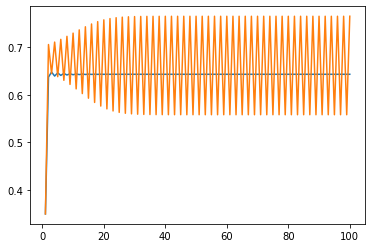

In [72]:
plt.plot([i for i in range(1,101)],a)
plt.plot([i for i in range(1,101)],b)

Se eligieron estos valores porque es un ejemplo de caos, pues aunque los valores de r son muy cercanos y se parten de 
puntos iniciales iguales, las graficas son totalmente distintas


## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [73]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [74]:
#definamos una función para plotear
def logis_plot(r):
    plt.figure(2)
    x=np.linspace(0,1,num=1000)
    plt.plot(x,r*x*(1-x))
    plt.plot(x,x)
    plt.show()

interactive_plot = interactive(logis_plot, r=(0,4.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0), Output(layout=Layout(height='350px')))…

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

 ª 

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [41]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

<img src="./bifurcacion.png"/>

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

<div class="alert alert-info">
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

In [80]:
import sympy

In [85]:
miu = symbols('mu')
x = symbols('x')

In [86]:
solve(Eq(x,1-miu*x**2),x)

[(sqrt(4*mu + 1) - 1)/(2*mu), -(sqrt(4*mu + 1) + 1)/(2*mu)]

In [87]:
abs(diff(1-miu*x**2,x)).replace(x, (sympy.sqrt(4*miu+1)-1)/(2*miu))

2*Abs(sqrt(4*mu + 1)/2 - 1/2)

In [88]:
#los intervalos de estabilidad para miu son:
solve(abs(diff(1-miu*x**2,x)).replace(x, (sympy.sqrt(4*miu+1)-1)/(2*miu)) <1)

(-1/4 < mu) & (mu < 3/4)

Diagraba CobWeb

In [89]:
def nueva_plot(u):
    plt.figure(4)
    x=np.linspace(-1,1,num=1000)
    plt.plot(x,1-u*x**2)
    plt.plot(x,x+1)
    plt.show()

interactive_plot = interactive(nueva_plot, u=(-4,4.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='u', max=4.0, min=-4.0), Output(layout=Layout(height=…

Y el diagrama de Bifurcación:

In [92]:
#definamos de nuevo la función (no simbólico)
def nueva(x,w):
    return 1-w*x**2

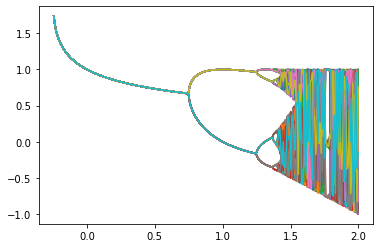

In [93]:
w_random= np.linspace(-4,4,1000)
x = 1e-5 * np.ones(1000)
for i in range(1000):
    x = nueva(x,w_random)
    if i >= (900):
        plt.plot(u_rand, x)